# Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [3]:
def matched_beam(p,lambda_,r0,N=10000,figsize=(10,8)):
    w=np.exp(-1j*2*np.pi*np.dot(p,r0)/(lambda_))
    w=w/np.sqrt(np.sum(abs(w)**2))
    thetas=np.linspace(0,2*np.pi,N)
    r=np.array([np.cos(thetas),np.sin(thetas)])
    b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(p,r)/(lambda_)))
    return b_gain,thetas

In [4]:
def flex_beam(p,lambda_,r0,Thetas,N=10000,figsize=(10,8)):
    p=np.array(p)
    r0=np.array(r0)
    Thetas=np.array(Thetas)
    if len(r0.shape)<=1:
        r0=np.expand_dims(r0,axis=0)
    if Thetas.shape[0]!=r0.shape[0]:
        Thetas=Thetas.repeat(r0.shape[0])
    Theta=Thetas/360*2*np.pi
    sigma=np.sqrt(2-2*np.cos(Theta))
    ampli=(2*np.pi)**2*np.exp(-2*(np.pi**2)*(sigma**2)*(np.linalg.norm(p,axis=1)**2)).reshape((-1,1))
    w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(p,r0.T)/(lambda_)))
    w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
    w=np.sum(w,axis=1)
    w=w/np.sqrt(np.sum(abs(w)**2))
    N=10000
    thetas=np.linspace(0,2*np.pi,N)
    r=np.array([np.cos(thetas),np.sin(thetas)])
    b_gain=abs((np.exp(1j*2*np.pi*np.dot(p,r)/(lambda_))).T@w)
    return b_gain,thetas

In [5]:
def set_antenna(numbers,radius):
    assert len(numbers)==len(radius)
    p=[]
    for num,r in zip(numbers,radius):
        angle_antennas=np.linspace(0,2*np.pi,num)
        p.append(r*np.array([np.cos(angle_antennas),np.sin(angle_antennas)]).T)
    p=np.vstack(p)
    return p

In [6]:
lambda_=1
sigma=0.1
C0=0.8
B=2e+6

angles=40
r0=[np.cos(angles*np.pi/180),np.sin(angles*np.pi/180)]
r0

[0.7660444431189781, 0.6427876096865393]

## Matched Beam with different number of antennas

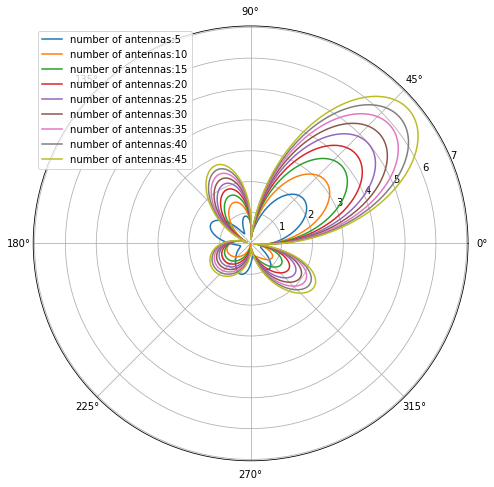

In [363]:
plt.figure(figsize=(10,8))
plt.polar()
for i in range(5,50,5):
    p=set_antenna([i],[lambda_/2])
    b_gain,thetas=matched_beam(p=p,r0=r0,lambda_=lambda_)
    plt.plot(thetas,b_gain,label="number of antennas:"+str(i))
plt.legend()
plt.show()

## Matched Beam with different number of antennas and different radius

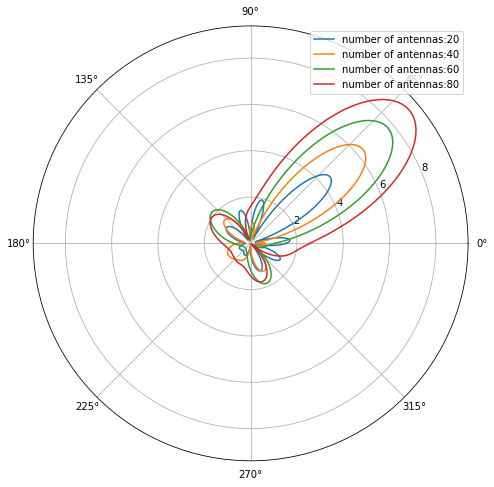

In [364]:
plt.figure(figsize=(10,8))
plt.polar()
for i in range(1,5):
    numbers=np.zeros(i,dtype=int)
    numbers[:]=20
    p=set_antenna(numbers,[lambda_/(j+1) for j in range(i) ])
    b_gain,thetas=matched_beam(p=p,r0=r0,lambda_=lambda_)
    plt.plot(thetas,b_gain,label="number of antennas:"+str(i*20))
plt.legend()
plt.show()

## Flex Beam with different number of antennas

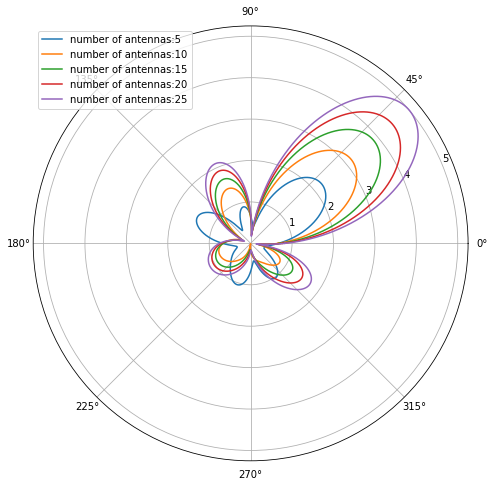

In [367]:
plt.figure(figsize=(10,8))
plt.polar()
for i in range(5,30,5):
    p=set_antenna([i],[lambda_/2])
    b_gain,thetas=flex_beam(p=p,r0=r0,Thetas=[20],lambda_=lambda_)
    plt.plot(thetas,b_gain,label="number of antennas:"+str(i))
plt.legend()
plt.show()

## Flex Beam with different number of antennas and different radius

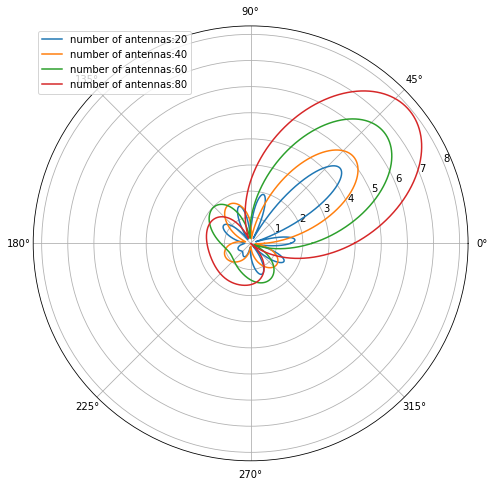

In [368]:
plt.figure(figsize=(10,8))
plt.polar()
for i in range(1,5):
    numbers=np.zeros(i,dtype=int)
    numbers[:]=20
    p=set_antenna(numbers,[lambda_/(j+1) for j in range(i)])
    b_gain,thetas=flex_beam(p=p,r0=r0,Thetas=[20],lambda_=lambda_)
    plt.plot(thetas,b_gain,label="number of antennas:"+str(i*20))
plt.legend()
plt.show()

## Flex Beam with different Theta

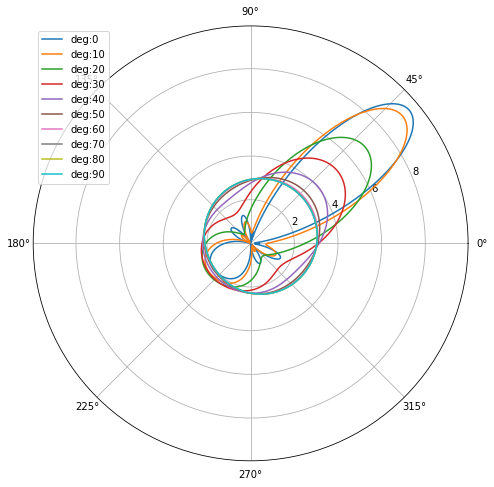

In [370]:
p=set_antenna([50,30,10],[1,0.5,0.1])
plt.figure(figsize=(10,8))
plt.polar()
for i in range(10):
    b_gain,thetas=flex_beam(p=p,r0=r0,Thetas=[i*10+1],lambda_=lambda_)
    plt.plot(thetas,b_gain,label="deg:"+str(i*10))
    plt.legend()
plt.show()

# Data Rate

In [27]:
n=2
np.random.seed(1)
mu=np.random.rand(n)*2*np.pi
kappa=np.random.randint(1,5,n)
number_users=np.random.randint(1,100,2)
p=set_antenna([50,30,10],[1,0.5,0.1])
noise=0.1
mu,kappa,number_users

(array([2.62022653, 4.52593227]), array([4, 2]), array([76,  6]))

In [28]:
users=[]
for i in range(n):
    s=np.random.vonmises(mu[i], kappa[i], number_users[i])
    users.append(s)
users=np.hstack(users)
r=np.array([np.cos(users),np.sin(users)])
users.shape,r.shape

((82,), (2, 82))

## Matched Beam's Data Rate

In [29]:
R_user=[]
for m in mu:
    r0=[np.cos(m), np.sin(m)]
    w=np.exp(-1j*2*np.pi*np.dot(p,r0)/lambda_)
    w=w/np.sqrt(np.sum(abs(w)**2))
    b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(p,r)/(lambda_)))
    for k in range(users.shape[0]):
        R_user.append(B*np.log2(1+b_gain[i]/noise*C0))

R_aver=np.mean(R_user)/users.shape[0]
R_aver

98912.62263872192

## Flex Beam's Data Rate

In [31]:
R_user=[]
r0=np.array([np.cos(mu), np.sin(mu)])
Theta=np.array([20,20])*2*np.pi/360
sigma=np.sqrt(2-2*np.cos(Theta))
ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(p,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(p,r0)/(lambda_)))
w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
w=np.sum(w,axis=1)
w=w/np.sqrt(np.sum(abs(w)**2))
b_gain=abs((np.exp(1j*2*np.pi*np.dot(p,r)/(lambda_))).T@w)
for k in range(users.shape[0]):
        R_user.append(B*np.log2(1+b_gain[i]/noise*C0))
R_aver=np.mean(R_user)/users.shape[0]
R_aver

120669.86174156675